In [2]:
from wyvern.performance.takeoff import prop_thrust, ground_roll_sweep, takeoff_distance
from wyvern.data.propellers import PROP_10X5, PROP_8X8, PROP_9X6
from wyvern.performance.models import QuadraticLDModel

# parmeters
mass = 1.627 # kg
v_hw = 3.0 # m/s
v_max = 9.0 # m/s
aero_model = QuadraticLDModel(c_d0=0.0318, e_inviscid=0.95, K=0.45, aspect_ratio=5.1)
mu = 0.1    # ground friction coefficient
CLgr = 0.1 # corresponds to roughly 2 degrees of AoA
thrust_model = prop_thrust(PROP_8X8)

# calculate takeoff distance
v_series, s_series = ground_roll_sweep(v_hw=v_hw, v_max=v_max, mass=mass, mu=mu, CLgr=CLgr, thrust_model=thrust_model, aero_model=aero_model)
s_to = takeoff_distance(v_hw=v_hw, v_lo=8.05, mass=mass, mu=mu, CLgr=CLgr, thrust_model=thrust_model, aero_model=aero_model)
print(f'Takeoff distance: {s_to:.2f} m')

Takeoff distance: 6.12 m


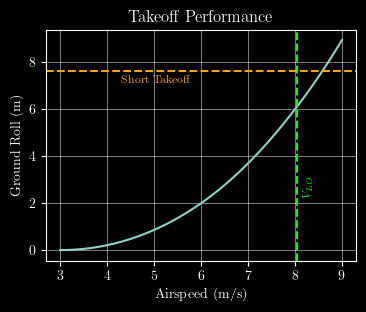

In [3]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams["text.usetex"] = True
# use computer modern serif font for all text
rcParams["font.family"] = "serif"
plt.style.use("dark_background")

plt.figure(figsize=(4,3))
plt.plot(v_series, s_series)
plt.axvline(8.05, color="lime", linestyle="--", label="Short Takeoff")
plt.text(8.15, 2.2, "$V_{LO}$", fontsize=8, color="lime", ha="left", va="bottom", rotation=90)
plt.axhline(7.62, color="orange", linestyle="--", label="Short Takeoff")
plt.text(4.3, 7.42, "Short Takeoff", fontsize=8, color="orange", ha="left", va="top")
plt.xlabel("Airspeed (m/s)")
plt.ylabel("Ground Roll (m)")
plt.grid(linewidth=0.5, alpha=0.7)
plt.title("Takeoff Performance")
plt.savefig("takeoff_distance.png", dpi=500, transparent=True, bbox_inches="tight")  

